In [2]:
import pandas as pd
df = pd.read_csv('medical_examination.csv')

def BMI(row):
    result = row['weight']/((row['height']/100)**2)
    if result > 25:
        return 1
    else:
        return 0
df['overweight'] = df.apply(BMI, axis=1)

def nor_cho(row):
    if row['cholesterol'] == 1:
        return 0
    elif row['cholesterol'] > 1:
        return 1
df['cholesterol'] = df.apply(nor_cho, axis=1)

def nor_gluc(row):
    if row['gluc'] == 1:
        return 0
    elif row['gluc'] > 1:
        return 1
df['gluc'] = df.apply(nor_gluc, axis=1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [3]:
import seaborn as sns
result = df[['cardio','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']]
result
# sns.catplot(data=result, )

,cardio,cholesterol,gluc,smoke,alco,active,overweight
0,0,0,0,0,0,1,0
1,1,1,0,0,0,1,1
2,1,1,0,0,0,0,0
3,1,0,0,0,0,1,1
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
69995,0,0,0,1,0,1,1
69996,1,1,1,0,0,1,1
69997,1,1,0,0,1,0,1
69998,1,0,1,0,0,0,1


In [4]:
result = result.melt(id_vars=['cardio'], # Column that is kept unchanged
                    value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], # Column that are melted
                    var_name='variable', # New column name
                    value_name='value') # New column name

In [5]:
result

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [6]:
result = result.groupby(['cardio','variable','value'])['value'].count().reset_index(name="total")
result

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


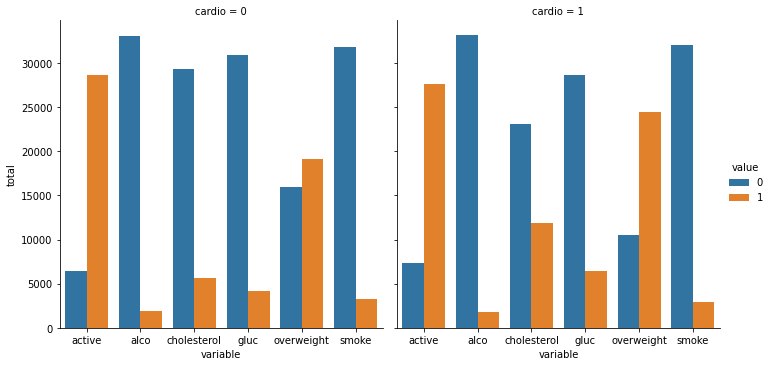

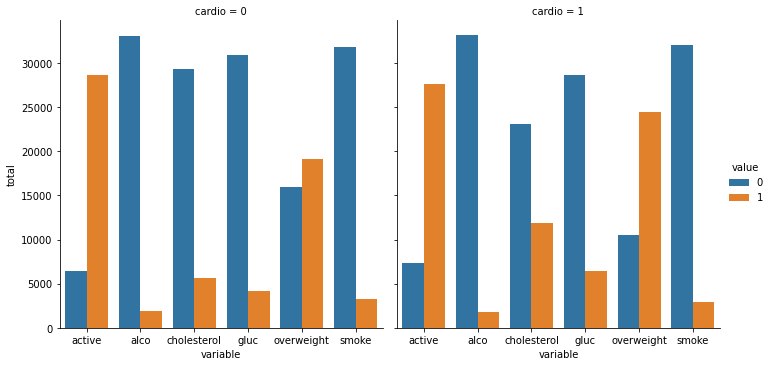

In [7]:
import seaborn as sns
fig = sns.catplot(data=result, x = 'variable', y='total', hue='value', col='cardio', kind='bar')
fig = fig.fig
fig

In [8]:
df = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


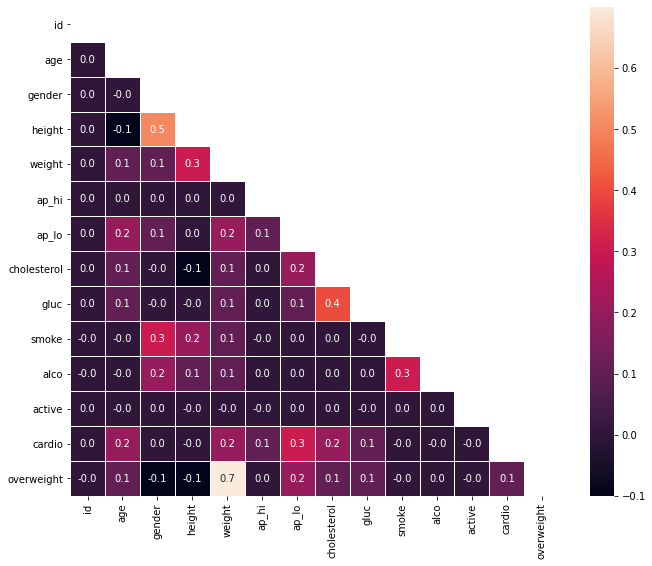

In [9]:
import numpy as np
import matplotlib.pyplot as plt
corr = df.corr().round(1).astype(np.float32)
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(data=corr, mask=mask, annot=True, linewidths=.5, square=True, fmt='.1f')